In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc,roc_curve
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

In [0]:
#Read bank data from csv file
my_df = pd.read_csv("bank.csv")

In [0]:
my_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:

my_df.isnull().values.any()

False

### 2. Drop the columns which are unique for all users like IDs (5 points)

In [0]:

my_df = my_df.drop(["RowNumber","CustomerId","Surname"], axis = 1)

In [0]:
my_df.shape

(10000, 11)

### 3. Distinguish the feature and target set (5 points)

In [0]:
my_df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

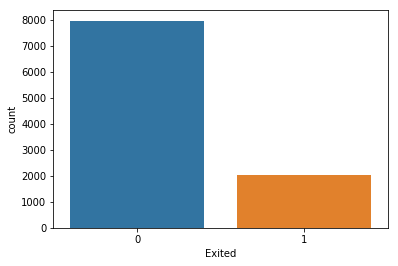

In [0]:
plot = sns.countplot(x = "Exited", data = my_df)
plot.set_xticklabels(plot.get_xticklabels());

In [0]:
my_df = pd.get_dummies(my_df,drop_first=True)

In [0]:
my_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### 4. Divide the data set into Train and test sets

In [0]:

X = my_df.drop(["Exited"], axis=1)

y = my_df["Exited"]

In [0]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [0]:
print("Bank Train Data Shape : {0}".format(X_train.shape))
print("Bank Test Data Shape : {0}".format(X_test.shape))
print("Bank Full Data Shape : {0}".format(X.shape))

Bank Train Data Shape : (7000, 11)
Bank Test Data Shape : (3000, 11)
Bank Full Data Shape : (10000, 11)


### 5. Normalize the train and test data (5 points)

In [0]:
# For NN model it's alway good if we do data normalization
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

### 6. Initialize & build the model (10 points)

In [0]:
#Import Tensorflow & Keras Library
import tensorflow as tf
import keras

Using TensorFlow backend.


In [0]:

my_model = tf.keras.models.Sequential()

my_model.add(tf.keras.layers.Dense(6,  activation='relu', input_shape=(11,)))

my_model.add(tf.keras.layers.Dense(6,  activation='relu'))
my_model.add( tf.keras.layers.Dense(1,activation='sigmoid', name='output'))

my_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# Fit the model with 100 epochs and batch size 30
history =my_model.fit(X_train, y_train,epochs=100,batch_size = 30,validation_data=(X_test, y_test) )

W0901 22:31:46.787823  4940 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 2s 222us/sample - loss: 0.5610 - accuracy: 0.7440 - val_loss: 0.4975 - val_accuracy: 0.7977
Epoch 2/100
7000/7000 [==============================] - 1s 132us/sample - loss: 0.4937 - accuracy: 0.7949 - val_loss: 0.4779 - val_accuracy: 0.8003
Epoch 3/100
7000/7000 [==============================] - 1s 189us/sample - loss: 0.4786 - accuracy: 0.7954 - val_loss: 0.4643 - val_accuracy: 0.8023
Epoch 4/100
7000/7000 [==============================] - 1s 185us/sample - loss: 0.4673 - accuracy: 0.7983 - val_loss: 0.4532 - val_accuracy: 0.8077
Epoch 5/100
7000/7000 [==============================] - 1s 168us/sample - loss: 0.4578 - accuracy: 0.8031 - val_loss: 0.4438 - val_accuracy: 0.8147
Epoch 6/100
7000/7000 [==============================] - 1s 140us/sample - loss: 0.4499 - accuracy: 0.8059 - val_loss: 0.4361 - val_accuracy: 0.8173
Epoch 7/100
7000/7000 [==============================] - 1

7000/7000 [==============================] - 1s 146us/sample - loss: 0.3475 - accuracy: 0.8559 - val_loss: 0.3513 - val_accuracy: 0.8570
Epoch 56/100
7000/7000 [==============================] - 2s 218us/sample - loss: 0.3474 - accuracy: 0.8569 - val_loss: 0.3512 - val_accuracy: 0.8597
Epoch 57/100
7000/7000 [==============================] - 2s 221us/sample - loss: 0.3472 - accuracy: 0.8564 - val_loss: 0.3513 - val_accuracy: 0.8590
Epoch 58/100
7000/7000 [==============================] - 2s 260us/sample - loss: 0.3468 - accuracy: 0.8554 - val_loss: 0.3525 - val_accuracy: 0.8573
Epoch 59/100
7000/7000 [==============================] - 1s 169us/sample - loss: 0.3467 - accuracy: 0.8584 - val_loss: 0.3525 - val_accuracy: 0.8580
Epoch 60/100
7000/7000 [==============================] - 2s 226us/sample - loss: 0.3465 - accuracy: 0.8563 - val_loss: 0.3510 - val_accuracy: 0.8583
Epoch 61/100
7000/7000 [==============================] - 2s 224us/sample - loss: 0.3465 - accuracy: 0.8554 - val

### 7. Optimize the model (Optional)


### Build the Model with Adam optimizer and early stop which help  for model to protect from overfitting

In [0]:

Opt_mymodel = tf.keras.models.Sequential()

Opt_mymodel.add(tf.keras.layers.Dense(6,  activation='relu', input_shape=(11,)))

Opt_mymodel.add(tf.keras.layers.Dense(6,  activation='relu'))
Opt_mymodel.add( tf.keras.layers.Dense(1,activation='sigmoid', name='output'))

Opt_mymodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [0]:
history =Opt_mymodel.fit(X_train, y_train, 
          validation_data=(X_train, y_train), 
          epochs=300,
          batch_size=32,
          callbacks=[earlyStop])

Train on 7000 samples, validate on 7000 samples
Epoch 1/300
7000/7000 [==============================] - 3s 382us/sample - loss: 0.5279 - accuracy: 0.7716 - val_loss: 0.4744 - val_accuracy: 0.7954
Epoch 2/300
7000/7000 [==============================] - 1s 181us/sample - loss: 0.4599 - accuracy: 0.7954 - val_loss: 0.4494 - val_accuracy: 0.7954
Epoch 3/300
7000/7000 [==============================] - 1s 164us/sample - loss: 0.4450 - accuracy: 0.7954 - val_loss: 0.4398 - val_accuracy: 0.7954
Epoch 4/300
7000/7000 [==============================] - 2s 315us/sample - loss: 0.4377 - accuracy: 0.7954 - val_loss: 0.4341 - val_accuracy: 0.7954
Epoch 5/300
7000/7000 [==============================] - 2s 279us/sample - loss: 0.4326 - accuracy: 0.7954 - val_loss: 0.4290 - val_accuracy: 0.7954
Epoch 6/300
7000/7000 [==============================] - 2s 246us/sample - loss: 0.4279 - accuracy: 0.7960 - val_loss: 0.4248 - val_accuracy: 0.7979
Epoch 7/300
7000/7000 [==============================] - 2

Epoch 110/300
7000/7000 [==============================] - 2s 274us/sample - loss: 0.3303 - accuracy: 0.8649 - val_loss: 0.3288 - val_accuracy: 0.8660
Epoch 111/300
7000/7000 [==============================] - 2s 259us/sample - loss: 0.3305 - accuracy: 0.8649 - val_loss: 0.3282 - val_accuracy: 0.8663
Epoch 112/300
7000/7000 [==============================] - 2s 298us/sample - loss: 0.3302 - accuracy: 0.8643 - val_loss: 0.3284 - val_accuracy: 0.8660
Epoch 113/300
7000/7000 [==============================] - 2s 256us/sample - loss: 0.3301 - accuracy: 0.8653 - val_loss: 0.3290 - val_accuracy: 0.8664
Epoch 114/300
7000/7000 [==============================] - 2s 252us/sample - loss: 0.3301 - accuracy: 0.8644 - val_loss: 0.3286 - val_accuracy: 0.8651
Epoch 115/300
7000/7000 [==============================] - 1s 185us/sample - loss: 0.3305 - accuracy: 0.8641 - val_loss: 0.3279 - val_accuracy: 0.8667
Epoch 116/300
7000/7000 [==============================] - 2s 240us/sample - loss: 0.3300 - ac

In [0]:
Opt_mymodel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
output (Dense)               (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### 8. Predict the results using 0.5 as a threshold (Optional)


In [0]:
y_model_pred = Opt_model.predict(X_test)
y_pred = (y_model_pred > 0.5) 

### 9. Print the Accuracy score and confusion matrix (5 points)

In [0]:
cm = confusion_matrix(y_test, y_pred)
print("ANN Model Confussion Matrix : \n {0}\n".format(cm))

TN, FP,FN, TP = cm.ravel()
Result=pd.DataFrame(index=["TrueNegatives","FalsePositives","FalseNegatives","TruePositives","Accuracy", "Recall", "Precision", "F1_Score"])

ANN_ModelResult=[TN,FP,FN,TP,accuracy_score(y_test, y_pred), 
                   recall_score(y_test, y_pred), 
                   precision_score(y_test, y_pred),
                   f1_score(y_test, y_pred)]

Result["ANN_Model_Result"]=ANN_ModelResult

print("ANN Model Result : \n\n {0}\n".format(Result))

ANN Model Confussion Matrix : 
 [[2289  106]
 [ 306  299]]

ANN Model Result : 

                 ANN_Model_Result
TrueNegatives        2289.000000
FalsePositives        106.000000
FalseNegatives        306.000000
TruePositives         299.000000
Accuracy                0.862667
Recall                  0.494215
Precision               0.738272
F1_Score                0.592079

